Version information
python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
matplotlib: 3.7.4
numpy: 1.24.3


[nltk_data] Downloading package punkt to /Users/parag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Accuracy: 0.40671624815959484
Average Precision: 0.4518625531697049
Average F1-Score: 0.4171411785386974


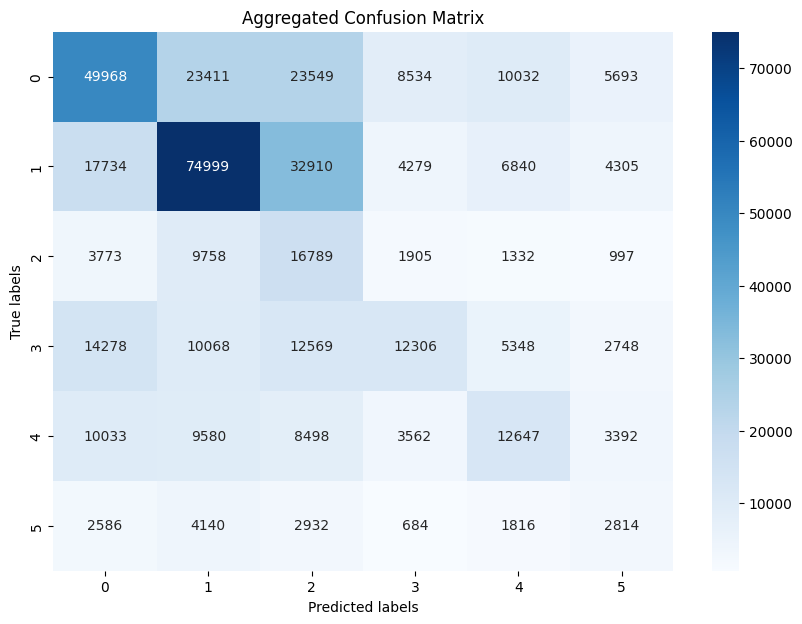

[nltk_data] Downloading package punkt to /Users/parag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
# Import necessary libraries
from __future__ import absolute_import, division, print_function

%matplotlib inline

import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

print("Version information")

print("python: {}".format(sys.version))
print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from naivebayes import EmotionClassifier, cross_validate_evaluate

import nltk
nltk.download('punkt')


Naive Bayes

In [6]:
# Load the dataset
df = pd.read_csv("../text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
# Preprocess the text
df['processed_text'] = df['text'].apply(EmotionClassifier.preprocess_text)
df.head()

,Unnamed: 0,text,label,processed_text
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,3,i dont know i feel so lost,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...


In [8]:
# Convert data for cross-validation
X = df['processed_text'].to_numpy()
y = df['label'].to_numpy()

# Perform cross-validation and evaluate the model
acc, prec, f1, cm = cross_validate_evaluate(X, y)

print("Average Accuracy:", np.mean(acc))
print("Average Precision:", np.mean(prec))
print("Average F1-Score:", np.mean(f1))


Average Accuracy: 0.4064907407627499
Average Precision: 0.45094832020382825
Average F1-Score: 0.4169481168357446


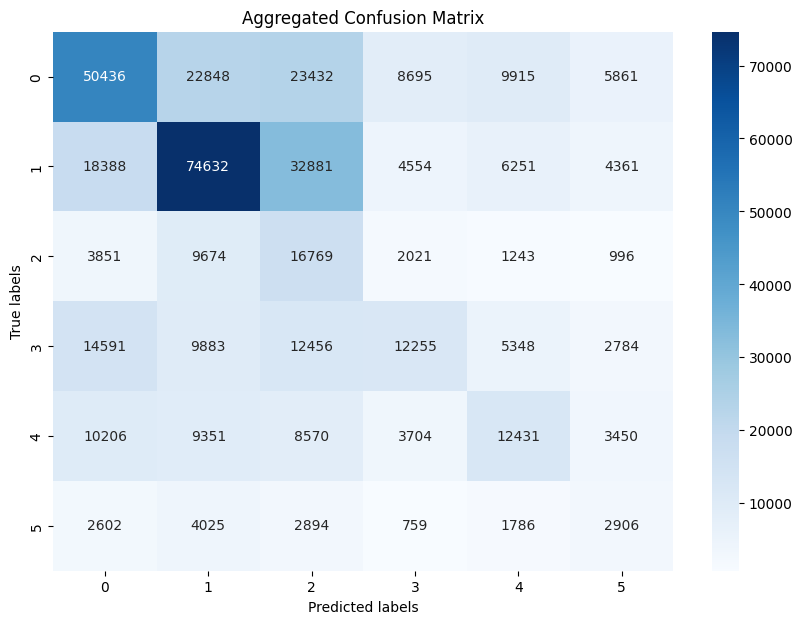

In [9]:
# Plot the aggregated confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()